In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt

from pyslingshot import Slingshot
import scanpy as sc

In [34]:
start_node=''
end_nodes=[]
celltype_key='newcelltype'
obsm_key='X_umap'
dataset="M-MG"

In [3]:
#adata=sc.read_h5ad(f"D:/111/{dataset}_cleaned.h5ad")

In [3]:
adata=sc.read_h5ad(f"../1.subset/{dataset}_cleaned.h5ad")

AnnData object with n_obs × n_vars = 18859 × 12088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'gland', 'stage_old', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_MT', 'pct_counts_MT', 'log1p_total_counts_MT', 'total_counts_RIBO', 'pct_counts_RIBO', 'log1p_total_counts_RIBO', 'leiden', 'anno', 'stage_new', 'species', 'celltype', 'stage', 'cellid', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'newcelltype', 'subtype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'gland_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'newcelltype_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'stage_colors', 'subtype_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'normalized', 'spliced', 'unspliced'


In [4]:
adata

AnnData object with n_obs × n_vars = 10880 × 12088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'gland', 'stage_old', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'total_counts_MT', 'pct_counts_MT', 'log1p_total_counts_MT', 'total_counts_RIBO', 'pct_counts_RIBO', 'log1p_total_counts_RIBO', 'leiden', 'anno', 'stage_new', 'species', 'celltype', 'stage', 'cellid', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'newcelltype', 'subtype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'gland_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'newcelltype_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'stage_colors', 'subtype_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'normalized', 'spliced', 'unspliced'


In [30]:
if start_node and end_nodes:
    slingshot = Slingshot(adata, celltype_key=celltype_key, obsm_key=obsm_key, debug_level='verbose',end_nodes=end_nodes,start_node=start_node)
elif start_node:
    slingshot = Slingshot(adata, celltype_key=celltype_key, obsm_key=obsm_key, debug_level='verbose',start_node=start_node)
else:
    slingshot = Slingshot(adata, celltype_key=celltype_key, obsm_key=obsm_key, debug_level='verbose')
    

3


666
Lineages: [Lineage[0, 6, 5, 2, 1], Lineage[0, 6, 5, 3, 4], Lineage[0, 6, 7]]


  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @5 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D8000FC40>, <pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D8000FC70>]
Averaging branch @6 with lineages: [0, 1, 2] [<pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D8000FD00>, <pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D80197D60>]
Shrinking branch @6 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D8000FD00>, <pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D80197D60>]
Shrinking branch @5 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D8000FC40>, <pcurvepy2.pcurve.PrincipalCurve object at 0x0000023D8000FC70>]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4416\744503498.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


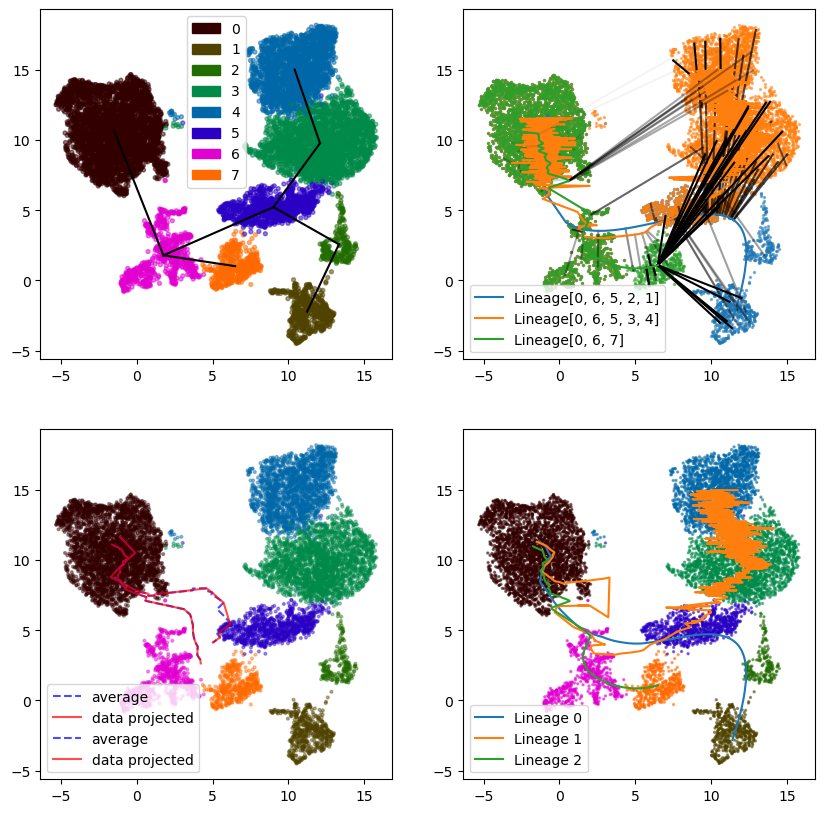

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

if start_node and end_nodes:
    print(f'start:{start_node} and end:{end_nodes}')
    slingshot = Slingshot(adata, celltype_key=celltype_key, obsm_key=obsm_key, debug_level='verbose',end_nodes=end_nodes,start_node=start_node)
elif start_node:
    print(f'start:{start_node}')
    slingshot = Slingshot(adata, celltype_key=celltype_key, obsm_key=obsm_key, debug_level='verbose',start_node=start_node)
else:
    print('666')
    slingshot = Slingshot(adata, celltype_key=celltype_key, obsm_key=obsm_key, debug_level='verbose')
slingshot.fit(num_epochs=1, debug_axes=axes)
fig.savefig(f'{dataset}_slingshot1.png',dpi=300)
fig.savefig(f'{dataset}_slingshot1.pdf',dpi=300)
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4416\1277112031.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


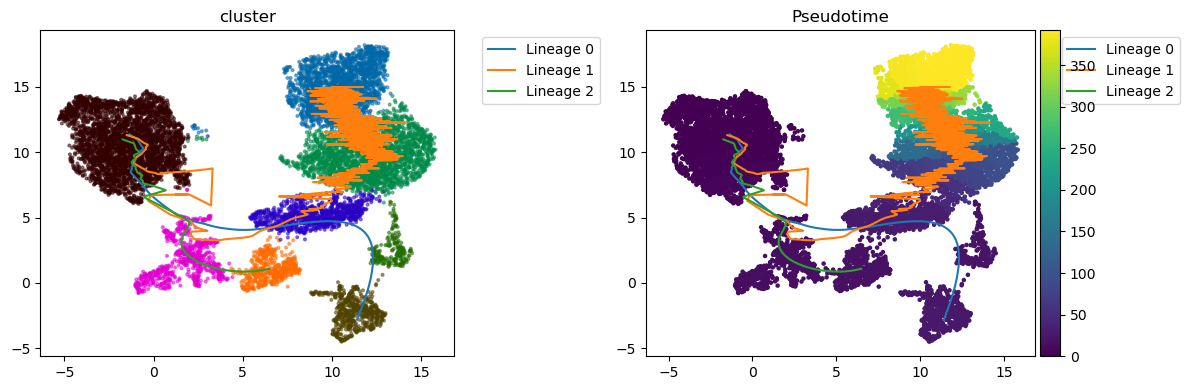

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('cluster')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.curves(axes[1], slingshot.curves)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# 自动调整子图排版，防止图例遮挡
fig.tight_layout()
fig.savefig(f'{dataset}_slingshot2.png',dpi=300)
fig.savefig(f'{dataset}_slingshot2.pdf',dpi=300)
fig.show()

In [10]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime

In [11]:
pseudotime

array([37.58717923, 23.02717536, 63.54586836, ..., 81.08940184,
       23.78016963, 24.37887713])